# Clustering
<br> __Cluster using K-Means.__
<br> Some random numbers are used to test K-Means.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


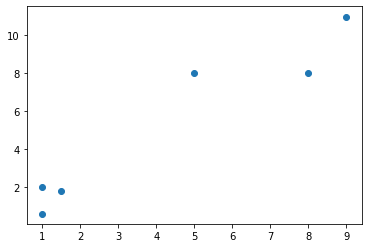

In [2]:
# Create random data points
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x, y)
plt.show()

In [3]:
# Create single matrix taking x, y as columns
X = [[p, q] for p, q in zip(x,y)]

print(X)

[[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]]


In [4]:
# K-Means with 2 clusters, initialise the class.
kmeans = KMeans(n_clusters=2)

# Perform clustering on data
kmeans.fit( X )

# Get the centers of two clusters.
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(f"Centroids: {centroids}")
print(f"Labels: {labels}")

Centroids: [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels: [1 0 1 0 1 0]


coordinate:[1, 2], label:1
coordinate:[5, 8], label:0
coordinate:[1.5, 1.8], label:1
coordinate:[8, 8], label:0
coordinate:[1, 0.6], label:1
coordinate:[9, 11], label:0


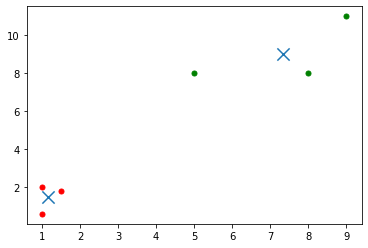

In [6]:
# Lets try to visualize the clusters
colors = ['g.', 'r.', 'c.', 'y.']
for i in range( len(X) ):
    print(f"coordinate:{X[i]}, label:{labels[i]}")
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
    
# Visualize the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=5, zorder=10)

## Clustering on digits data.
<br> 1. Load digits data
<br> 2. Number of clusters is 10. Targets are between 0 and 9. 
<br> 3. Try to verify cluster centroids with digit data targets. 

In [40]:
# Write code here as per the above steps.

from sklearn import datasets, metrics
from sklearn.preprocessing import scale

# Load digits dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

print(f"n_digits:{n_digits}, n_samples:{n_samples}, n_features:{n_features}")

n_digits:10, n_samples:1797, n_features:64


In [53]:
# K-Means with 10 clusters, random initialisation.
kmeans = KMeans(init='random', n_clusters=n_digits, n_init=10)
kmeans.fit( data )

# Get the centers of two clusters.
print(f"Centroids: {kmeans.cluster_centers_.shape}")
print(f"Labels: {kmeans.labels_}, shape:{kmeans.labels_.shape}")

print(f"Adjusted rand index: {metrics.adjusted_rand_score(labels, kmeans.labels_)}")
print(f"Adjusted mutual info: {metrics.adjusted_mutual_info_score(labels, kmeans.labels_)}")

Centroids: (10, 64)
Labels: [6 8 8 ... 8 3 3], shape:(1797,)
Adjusted rand index: 0.46588566424289474
Adjusted mutual info: 0.593029072452286


/home/mahabib/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [54]:
# K-Means with 10 clusters, KMeans++ initialisation.
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit( data )

# Get the centers of two clusters.
print(f"Centroids: {kmeans.cluster_centers_.shape}")
print(f"Labels: {kmeans.labels_}, shape:{kmeans.labels_.shape}")

print(f"Adjusted rand index: {metrics.adjusted_rand_score(labels, kmeans.labels_)}")
print(f"Adjusted mutual info: {metrics.adjusted_mutual_info_score(labels, kmeans.labels_)}")

Centroids: (10, 64)
Labels: [9 0 0 ... 0 1 1], shape:(1797,)
Adjusted rand index: 0.476430600944811
Adjusted mutual info: 0.603791531593142


/home/mahabib/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# Reduce Dimensionality
# PCA (Principal Component Analysis)

In [58]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

print(f"Adjusted rand index: {metrics.adjusted_rand_score(labels, kmeans.labels_)}")
# print(f"Adjusted mutual info: {metrics.adjusted_mutual_info_score(labels, kmeans.labels_)}")

Adjusted rand index: 0.3262711351002023


In [ ]:
# Write code to increase number of components and observe ARI and AMI.

